### Using Genetic Algorithm to approximate the global minima of the Himmelbalu function

Read about [Genetic Algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm)

Read about [Himmeblau function](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

Based on [Optimization with Metaheuristics](https://www.udemy.com/course/optimization-with-metaheuristics/learn/)

### Himmelblau function
$(x^2 + y - 11)^2 + (x + y^2 -7)^2$

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd

### Objective Function

In [2]:
def himmelblau(x, y):
    return ((x ** 2) + y - 11) ** 2 + (x + (y ** 2) - 7) ** 2

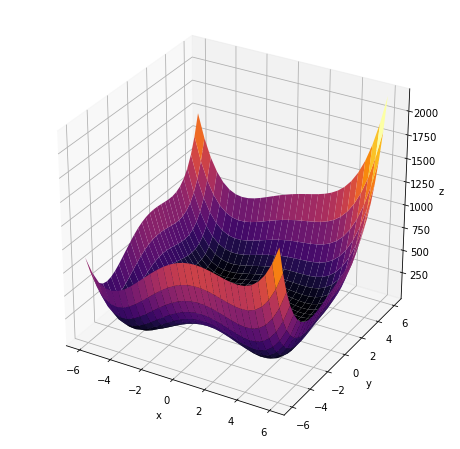

In [3]:
from mpl_toolkits import mplot3d

xs = np.linspace(-6, 6, 30)
ys = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(xs, ys)
Z = himmelblau(X, Y)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='inferno', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### model parameters

In [4]:
POPULATION = 300
GENERATION = 200
NUM_TS_CANDIDATES = 3
CROSSOVER_PROB = 1
MUTATION_PROB = 0.3
CHROMOSOME_LENGTH = 30

In [5]:
def to_num(arr): 
    return sum([(2**idx) * i for idx, i in enumerate(reversed(arr))])

def obj_value(chromosome): 
    lb_x, ub_x = lb_y, ub_y = -6,6
    len_x = len_y = len(chromosome)//2
    precision_x = (ub_x - lb_x)/((2 ** len_x) - 1)
    precision_y = (ub_y - lb_y)/((2 ** len_y) - 1)
    x = to_num(chromosome[len_x:]) * precision_x + lb_x
    y = to_num(chromosome[:len_y]) * precision_y + lb_y
    obj_value = himmelblau(x, y)
    return x, y, obj_value

def empty_population(length):
    return np.empty((0, length))

def generate_population(population, chromosome):
    all_solutions = empty_population(len(chromosome))
    for i in range(population):
        rd.shuffle(chromosome)
        all_solutions = np.vstack((all_solutions, chromosome))

    return all_solutions

### Initialization

In [6]:
initial_parent = np.random.randint(low=0, high=2, size=CHROMOSOME_LENGTH, dtype=int)
pool_of_solutions = generate_population(POPULATION, initial_parent)
best_of_each_generation = np.empty((0, CHROMOSOME_LENGTH + 1))

### Selection Operator

In [7]:
def tournament_select(population, num=NUM_TS_CANDIDATES):
    idxs = np.random.choice(len(population), num, replace=False)
    selected_parents = [population[idx] for idx in idxs]
    return sorted(selected_parents, key=lambda p: obj_value(p)[2])[0]

### Cross Over Operator

In [8]:
def cross_over(parent_1, parent_2, prob_cross_over=CROSSOVER_PROB):
    if np.random.random() < prob_cross_over:
        index_1 = np.random.randint(0, len(parent_1))
        index_2 = np.random.randint(0, len(parent_2))

        while index_2 == index_1:
            index_2 = np.random.randint(0, len(parent_2))

        idx_1 = min(index_1, index_2)
        idx_2 = max(index_1, index_2)

        return np.concatenate((parent_1[:idx_1], parent_2[idx_1: idx_2], parent_1[idx_2:])), \
                np.concatenate((parent_2[:idx_1], parent_1[idx_1: idx_2], parent_2[idx_2:]))
    else:
        return parent_1, parent_2

### Mutation Operator

In [9]:
def mutate(chromosome, prob_mutation=MUTATION_PROB):
    return [abs(x - 1) if np.random.random() < prob_mutation else x for x in chromosome]
    

In [10]:
for gen in range(1, GENERATION + 1):
    new_population = np.empty((0, CHROMOSOME_LENGTH))
    new_population_with_obj_val = np.empty((0, CHROMOSOME_LENGTH + 1))
    sorted_best_for_plotting = np.empty((0, CHROMOSOME_LENGTH + 1))
    
    for i in range(POPULATION // 2):
        parent_1 = tournament_select(pool_of_solutions)
        parent_2 = tournament_select(pool_of_solutions)
        
        child_1, child_2 = cross_over(parent_1, parent_2)
        child_1 = mutate(child_1)
        child_2 = mutate(child_2)
        
        *_, obj_value_1 = obj_value(child_1)
        *_, obj_value_2 = obj_value(child_2)
        
        new_population = np.vstack((new_population, child_1, child_2))
        new_population_with_obj_val = np.vstack((
            new_population_with_obj_val, 
            np.hstack((obj_value_1, child_1)), 
            np.hstack((obj_value_2, child_2))))
        
    pool_of_solutions = new_population
    sorted_best_for_plotting = np.array(sorted(new_population_with_obj_val, key=lambda r: r[0]))
    best_of_each_generation = np.vstack((best_of_each_generation, sorted_best_for_plotting[0]))
    

In [11]:
best_across_all_generations = sorted(best_of_each_generation, key=lambda r: r[0])[0]

In [12]:
[round(x, 7) for x in obj_value(best_across_all_generations[1:])]

[2.9944151, 2.008179, 0.0013798]

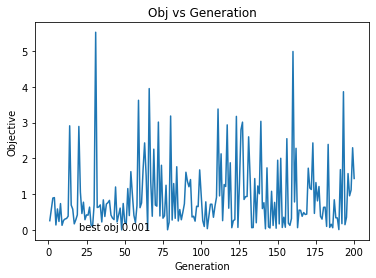

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, GENERATION+1), [b[0] for b in best_of_each_generation])
plt.title("Obj vs Generation")
plt.xlabel('Generation')
plt.ylabel('Objective')
plt.annotate(s="best obj {}".format(round(best_across_all_generations[0], 3)), xy=(20, best_across_all_generations[0]))
plt.show()